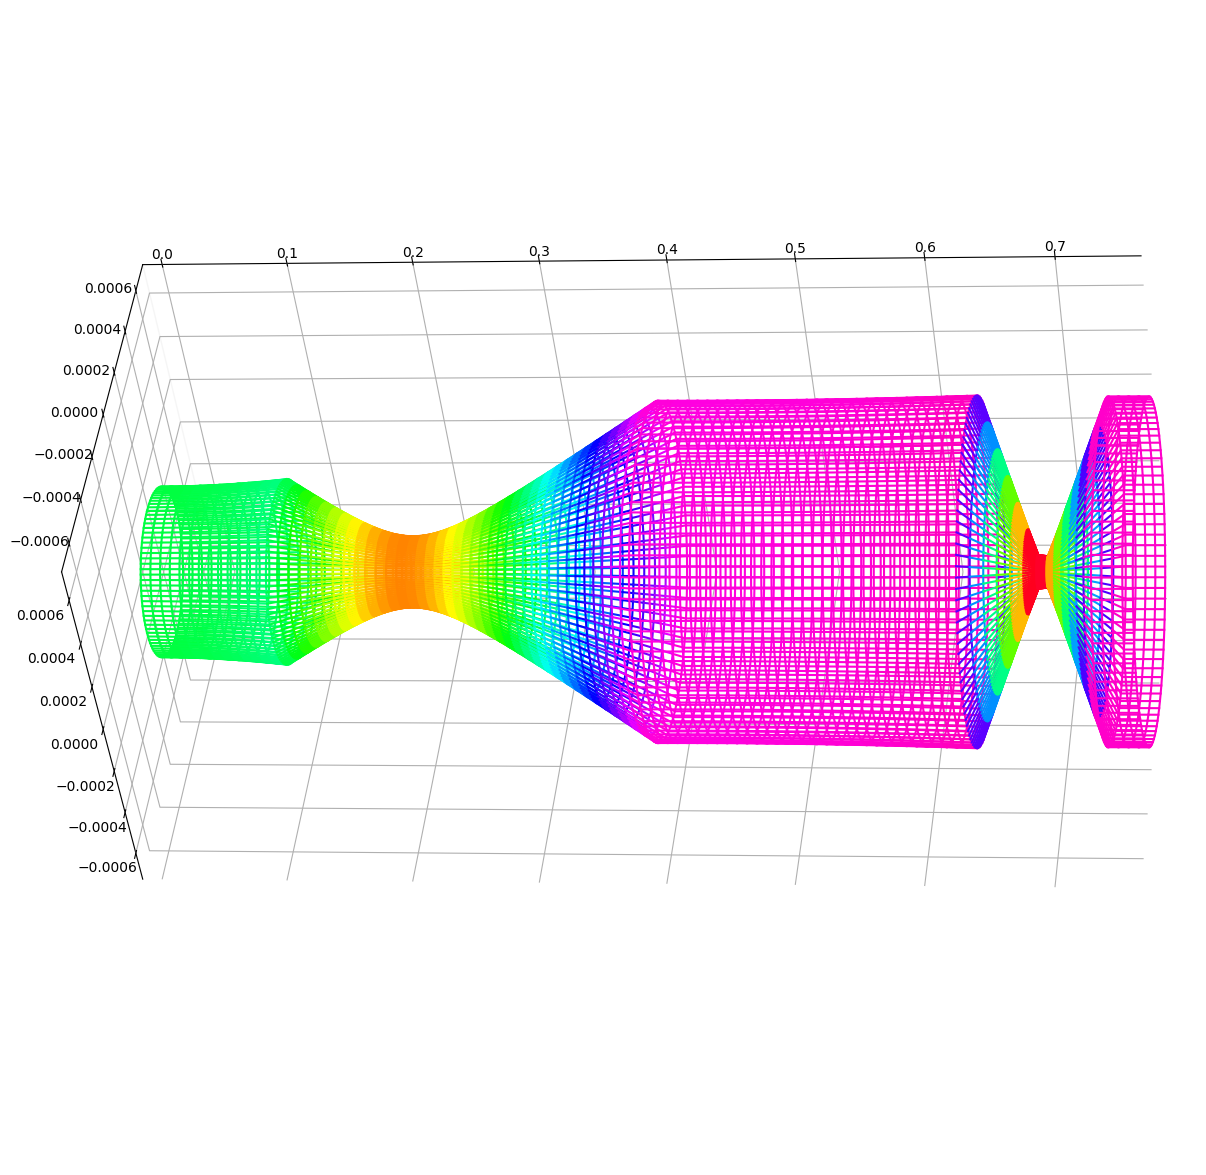

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

def read_data(file_path):
    return pd.read_excel(file_path)

def scale_z_values(z_values, scale_factor):
    return z_values * scale_factor

def create_meshgrid(theta_points=101, z_values=None):
    theta = np.deg2rad(np.linspace(0, 360, theta_points))
    z_mesh, theta_mesh = np.meshgrid(z_values, theta)
    return z_mesh, theta_mesh

def convert_to_cartesian(radii, theta_mesh):
    x = radii * np.cos(theta_mesh)
    y = radii * np.sin(theta_mesh)
    return x, y

def plot_3d_rings(ax, x, y, z_values, radii, cmap, norm):
    for i in range(len(z_values)):
        ring_x = np.append(x[:, i], x[0, i])
        ring_y = np.append(y[:, i], y[0, i])
        ring_z = np.full_like(ring_x, z_values[i])
        color = cmap(norm(radii[i]))
        ax.plot(ring_x, ring_y, ring_z, color=color)

        if i < len(z_values) - 1:
            next_ring_x = np.append(x[:, i + 1], x[0, i + 1])
            next_ring_y = np.append(y[:, i + 1], y[0, i + 1])
            next_ring_z = np.full_like(next_ring_x, z_values[i + 1])
            color = cmap(norm(radii[i + 1]))
            for j in range(101):
                ax.plot([ring_x[j], next_ring_x[j]], [ring_y[j], next_ring_y[j]], [ring_z[j], next_ring_z[j]], color=color)

def main():
    # Read data from the Excel file
    data = read_data("your_data.xlsx")

    # Extract 'w' and 'z' columns from the DataFrame
    w_values = data['w'].values
    z_values = data['z'].values

    # Given parameters
    z_R = 2  # Rayleigh range in meters
    z_s = 1  # Scale factor for z values

    # Scale the z values
    z_values = scale_z_values(z_values, z_s)

    # Create a meshgrid of points for the x-y plane
    z_mesh, theta_mesh = create_meshgrid(z_values=z_values)

    # Calculate the radii for each point on the meshgrid based on 'w' values
    radii = w_values

    # Convert polar coordinates to Cartesian coordinates
    x, y = convert_to_cartesian(radii, theta_mesh)

    # Create the 3D plot
    fig = plt.figure(figsize=(15, 15), facecolor='white')
    ax = fig.add_subplot(111, projection='3d')

    # Set the viewpoint at the angle
    ax.view_init(elev=10, azim=45, roll=-90)

    # Set the axis limits
    ax.set_xlim(-0.0007, 0.0007)
    ax.set_ylim(0.0007, -0.0007)
    ax.set_zlim(0, .75)  # Adjusted axis limits with the z_s scale factor
    
    # Get rid of colored axes planes
    # First remove fill
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')

    # Use a colormap to map colors based on radii values
    norm = plt.Normalize(radii.min(), radii.max())
    cmap = plt.get_cmap('gist_rainbow')

    # Plot the rings and connect them with lines
    plot_3d_rings(ax, x, y, z_values, radii, cmap, norm)

    # Set the aspect ratio to make the z-axis twice as long as x and y
    ax.set_box_aspect([1, 1, 2.3])

    # Display the grid lines
    ax.grid(True, linestyle='dashed', linewidth=0.5, color='gainsboro')

    # Save the plot as an image file with HD resolution (1920x1080 pixels)
    plt.savefig('gaussian_beam_plot_colormap.png', dpi=192, bbox_inches='tight')

    # Display the plot
    plt.show()

if __name__ == "__main__":
    main()
